In [0]:
import pandas as pd

In [0]:
df = pd.read_csv("s3://amazon-reviews-ma/landing/amazon_reviews_us_Apparel_v1_00.tsv", sep= '\t', on_bad_lines='skip')

In [0]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,32158956,R1KKOXHNI8MSXU,B01KL6O72Y,24485154,Easy Tool Stainless Steel Fruit Pineapple Core...,Apparel,4.0,0.0,0.0,N,Y,★ THESE REALLY DO WORK GREAT WITH SOME TWEAKING ★,"These Really Do Work Great, But You Do Need To...",2013-01-14
1,US,2714559,R26SP2OPDK4HT7,B01ID3ZS5W,363128556,V28 Women Cowl Neck Knit Stretchable Elasticit...,Apparel,5.0,1.0,2.0,N,Y,Favorite for winter. Very warm!,I love this dress. Absolute favorite for winte...,2014-03-04
2,US,12608825,RWQEDYAX373I1,B01I497BGY,811958549,James Fiallo Men's 12-Pairs Low Cut Athletic S...,Apparel,5.0,0.0,0.0,N,Y,Great Socks for the money.,"Nice socks, great colors, just enough support ...",2015-07-12
3,US,25482800,R231YI7R4GPF6J,B01HDXFZK6,692205728,Belfry Gangster 100% Wool Stain-Resistant Crus...,Apparel,5.0,0.0,0.0,N,Y,Slick hat!,"I bought this for my husband and WOW, this is ...",2015-06-03
4,US,9310286,R3KO3W45DD0L1K,B01G6MBEBY,431150422,JAEDEN Women's Beaded Spaghetti Straps Sexy Lo...,Apparel,5.0,0.0,0.0,N,Y,I would do it again!,Perfect dress and the customer service was awe...,2015-06-12


In [0]:
num_rows, num_columns = df.shape
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

Number of Rows: 5881874
Number of Columns: 15


In [0]:
df.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,5.881874e+06,5.881874e+06,5.881873e+06,5.881873e+06,5.881873e+06
mean,2.538800e+07,5.029080e+08,4.105261e+00,9.742111e-01,1.165795e+00
std,1.576273e+07,2.889382e+08,1.259230e+00,2.071668e+01,2.125568e+01
min,1.000300e+04,6.650000e+02,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.239497e+07,2.520753e+08,4.000000e+00,0.000000e+00,0.000000e+00
50%,2.336791e+07,5.049314e+08,5.000000e+00,0.000000e+00,0.000000e+00
75%,4.013374e+07,7.551277e+08,5.000000e+00,0.000000e+00,1.000000e+00
max,5.309656e+07,9.999979e+08,5.000000e+00,4.127800e+04,4.188900e+04


In [0]:
df.corr()

/root/.ipykernel/12227/command-4311305421300746-1134722465:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,customer_id,product_parent,star_rating,helpful_votes,total_votes
customer_id,1.000000,-0.000579,0.008182,0.007350,0.007526
product_parent,-0.000579,1.000000,0.000431,0.000855,0.000870
star_rating,0.008182,0.000431,1.000000,-0.007933,-0.012966
helpful_votes,0.007350,0.000855,-0.007933,1.000000,0.998811
total_votes,0.007526,0.000870,-0.012966,0.998811,1.000000


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
df = df[pd.to_numeric(df['star_rating'], errors='coerce').notna()]

In [0]:
# Replace with mode (most frequent value)
mode_value = df['star_rating'].mode()[0]
df['star_rating'] = pd.to_numeric(df['star_rating'], errors='coerce').fillna(mode_value)

In [0]:
df['star_rating'] = pd.to_numeric(df['star_rating'], errors='coerce')
df = df.dropna(subset=['star_rating'])

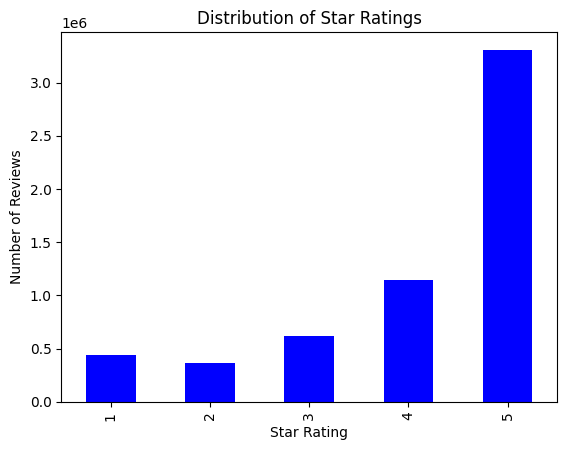

In [0]:
#Graph for number of Star Ratings
df['star_rating'] = df['star_rating'].astype(int)
df['star_rating'].value_counts().sort_index().plot(kind='bar', color='blue')
plt.title("Distribution of Star Ratings")
plt.xlabel("Star Rating")
plt.ylabel("Number of Reviews")
plt.savefig("star_ratings_distribution.png")
plt.show()

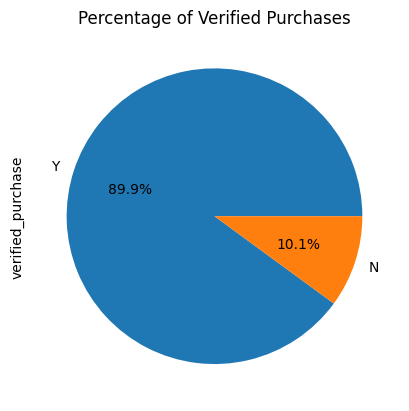

In [0]:
# Percentage of varified purchase
df['verified_purchase'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Percentage of Verified Purchases")
plt.savefig("verified_purchases_percentage.png")
plt.show()


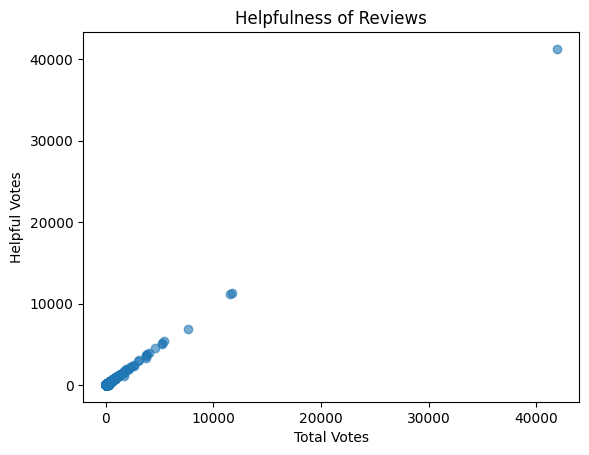

In [0]:
plt.scatter(df['total_votes'], df['helpful_votes'], alpha=0.6)
plt.title("Helpfulness of Reviews")
plt.xlabel("Total Votes")
plt.ylabel("Helpful Votes")
plt.savefig("helpfulness_of_reviews.png")
plt.show()

In [0]:
# Check for null values
null_values = df.isnull()
print(null_values)

         marketplace  customer_id  ...  review_body  review_date
0              False        False  ...        False        False
1              False        False  ...        False        False
2              False        False  ...        False        False
3              False        False  ...        False        False
4              False        False  ...        False        False
...              ...          ...  ...          ...          ...
5881869        False        False  ...        False        False
5881870        False        False  ...        False        False
5881871        False        False  ...        False        False
5881872        False        False  ...        False        False
5881873        False        False  ...        False        False

[5881873 rows x 15 columns]


In [0]:
# To see the number of null values for each column:
null_counts = df.isnull().sum()

print(null_counts)

marketplace            0
customer_id            0
review_id              0
product_id             0
product_parent         0
product_title         12
product_category       0
star_rating            0
helpful_votes          0
total_votes            0
vine                   0
verified_purchase      0
review_headline       55
review_body          784
review_date          108
dtype: int64


In [0]:
df.corr()

/root/.ipykernel/12227/command-4311305421300753-1134722465:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,customer_id,product_parent,star_rating,helpful_votes,total_votes
customer_id,1.000000,-0.000579,0.008182,0.007350,0.007526
product_parent,-0.000579,1.000000,0.000431,0.000855,0.000870
star_rating,0.008182,0.000431,1.000000,-0.007933,-0.012966
helpful_votes,0.007350,0.000855,-0.007933,1.000000,0.998811
total_votes,0.007526,0.000870,-0.012966,0.998811,1.000000


In [0]:
#Heatmap for the correlation

In [0]:
import seaborn as sns

/root/.ipykernel/12227/command-4311305421300756-2810148632:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


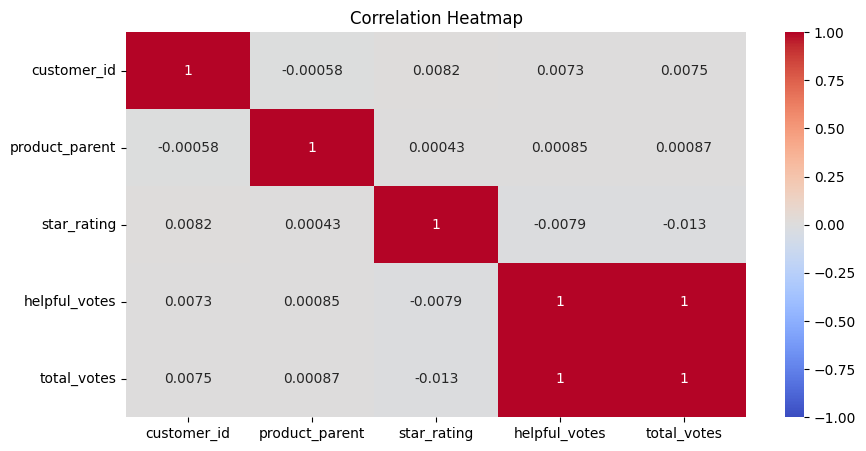

In [0]:
#Heatmap for the correlation
corr_matrix = df.corr()
plt.figure(figsize=(10, 5))  # Adjust the size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [0]:
from collections import Counter
import re

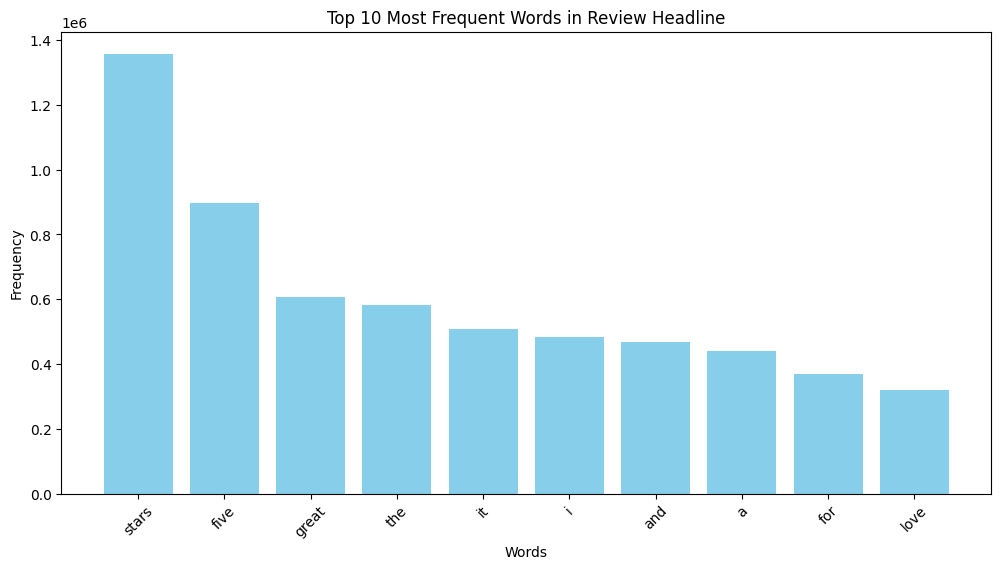

In [0]:
from collections import Counter
import re
combined_text = ' '.join(df['review_headline'].dropna())
words = re.findall(r'\w+', combined_text.lower())
word_counts = Counter(words)
most_common_words = word_counts.most_common(10)
words, counts = zip(*most_common_words)
plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title(f'Top {10} Most Frequent Words in Review Headline')
plt.xticks(rotation=45)
plt.show()